In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [68]:
GDP = pd.read_csv("C:/Users/anton/OneDrive - Chalmers/Läsår 2/DAT405 - AI/life-expectancy.csv")
life_expect = pd.read_csv("C:/Users/anton/OneDrive - Chalmers/Läsår 2/DAT405 - AI/maddison-data-gdp-per-capita-in-2011us.csv")

In [69]:
d = GDP.merge(life_expect, on=('Year', 'Entity'))
reduced_d = d[d.Year == 2015]

Text(0.5, 1.0, 'Scatter plot')

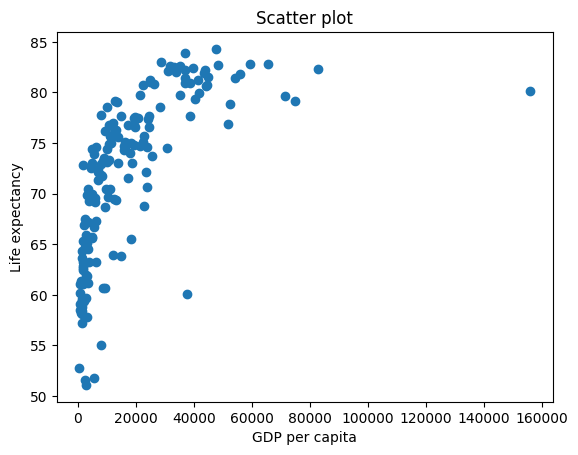

In [70]:
x,y = reduced_d['GDP per capita'], reduced_d['Life expectancy at birth (historical)']
plt.scatter(x,y)
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.title('Scatter plot')

**a) Which countries have a life expectancy higher than one standard deviation above the mean?**

In [71]:
std_exp = np.std(a=reduced_d['Life expectancy at birth (historical)'])
mean_exp = np.mean(a=reduced_d['Life expectancy at birth (historical)'])
mean_std_exp = mean_exp + std_exp

In [72]:
return_list = []
for i, r in reduced_d.iterrows():
    country = r["Entity"]
    life_exp = r['Life expectancy at birth (historical)']
    if life_exp > mean_std_exp:
        return_list.append(country)
return_list

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Cyprus',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom']

**b) Which countries have high life expectancy but have low GDP? Motivate how you have chosen to define “high” and “low”.**

In [73]:
std_gdp = np.std(a=reduced_d['GDP per capita'])
mean_gdp = np.mean(a=reduced_d['GDP per capita'])

mean_std_exp = mean_exp + std_exp/2
mean_std_gdp = mean_gdp - std_gdp/2

In [74]:
return_list = []
for i, r in reduced_d.iterrows():
    country = r["Entity"]
    life_exp = r['Life expectancy at birth (historical)']
    gdp = r['GDP per capita']
    if life_exp > mean_std_exp and gdp < mean_std_gdp:
        return_list.append(country)
return_list

['Cuba']

Answer: We have descided to define "high" as 1/2 standard deviation above the mean and "low" as 1/2 standard deviation below the mean. This is because the variables (life expectancy & GDP) have a relatively high correlation. If we would have chose 1 standard deviation we would not have gotten any result. 

**c) Does every strong economy (normally indicated by GDP) have high life expectancy?**

In [75]:
mean_std_gdp = mean_gdp + std_gdp/2
mean_std_exp = mean_exp + std_exp/2

In [76]:
return_list_high = []
return_list_low = []
for i, r in reduced_d.iterrows():
    country = r["Entity"]
    life_exp = r['Life expectancy at birth (historical)']
    gdp = r['GDP per capita']
    if gdp > mean_std_gdp:
        if life_exp > mean_std_exp:
            return_list_high.append(country)
        else:
            return_list_low.append(country)

In [77]:
tot_len = len(return_list_low + return_list_high)

percentage = len(return_list_low)/tot_len
print(f'Percentage of countries with low life expectancy and high GDP is {round(percentage*100, 2)}%')

Percentage of countries with low life expectancy and high GDP is 5.56%


Answer: No, 5,56% of the countries we are looking at have a high GDP and low life expectancy.

**d) Related to question d, what would happen if you use GDP per capita as an indicator of strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of d and e.**

Answer: From our results GDP per caipta is a relatively good indicator of a strong economy. It correlates with life expectancy indicating that if the GDP is high, so is the health of the inhabitants. And healthy inhabitants are the foundation to a strong economy. However we saw some outliers that had a high GDP per capita but not high life expectancy. In this case the welth might be inequally distributed over the population, and most people are still poor. Another factor that GDP per capita doesn't concider is where the money is coming from, if it's one indusry (eg oil) or multiple intustries. Having multiple strong industries are much prefered as it reduces the risk of an economic collapse. 
